In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [186]:
df = pd.read_csv("/final-new.csv",parse_dates=True)
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df['Year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df['Month'] = pd.to_datetime(df['date']).dt.strftime('%m')
df['Day'] = pd.to_datetime(df['date']).dt.strftime('%d')
df=df.set_index("date")
df

,Suspended Matter,Dissolved Organic Matter,Chlorophyll,Turbidity,Salinity,pH,Temperature,Dissolved Oxygen,Year,Month,Day
date,,,,,,,,,,,
2018-01-02,0.598896,0.559756,NaN,NaN,NaN,NaN,NaN,NaN,2018,01,02
2018-01-03,0.617667,0.550453,NaN,NaN,NaN,NaN,NaN,NaN,2018,01,03
2018-01-06,0.547938,0.475668,NaN,NaN,NaN,NaN,NaN,NaN,2018,01,06
2018-01-07,0.595860,0.522746,NaN,NaN,NaN,NaN,NaN,NaN,2018,01,07
2018-01-10,0.564151,0.468822,NaN,NaN,NaN,NaN,NaN,NaN,2018,01,10
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-26,0.518224,0.440914,NaN,NaN,NaN,NaN,NaN,NaN,2022,11,26
2022-11-27,0.512168,0.421120,0.084518,-0.037226,0.080303,7.782077,NaN,2.158886,2022,11,27
2022-11-28,0.514186,0.432148,NaN,NaN,NaN,NaN,NaN,NaN,2022,11,28


In [187]:
df.columns

Index(['Suspended Matter', 'Dissolved Organic Matter', 'Chlorophyll',
       'Turbidity', 'Salinity', 'pH', 'Temperature', 'Dissolved Oxygen',
       'Year', 'Month', 'Day'],
      dtype='object')

In [188]:
df1=df.filter(['Suspended Matter', 'Dissolved Organic Matter', 'Temperature','Chlorophyll', 'Turbidity', 'Salinity', 'Dissolved Oxygen', 'pH'])

In [189]:
df1.describe()

,Suspended Matter,Dissolved Organic Matter,Temperature,Chlorophyll,Turbidity,Salinity,Dissolved Oxygen,pH
count,1619.000000,1208.000000,71.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.572838,0.530834,29.256385,0.237312,-0.115971,0.155427,4.728860,7.965353
std,0.043115,0.064040,24.472383,0.105058,0.070076,0.055689,4.511646,0.157562
min,0.458765,0.364997,-123.148520,0.050465,-0.415972,-0.017826,-5.188777,7.403001
25%,0.541688,0.480821,26.427760,0.138866,-0.157036,0.110667,2.526770,7.865633
50%,0.579190,0.537796,32.391935,0.248585,-0.121292,0.162557,3.947785,7.992735
75%,0.607815,0.583422,41.379148,0.302384,-0.063260,0.186106,5.982763,8.073194
max,0.658440,1.049015,52.909043,0.570178,0.012330,0.271471,39.726849,8.278259


In [190]:
nan_count = df1.isna().sum()
print(nan_count)

Suspended Matter               5
Dissolved Organic Matter     416
Temperature                 1553
Chlorophyll                 1474
Turbidity                   1474
Salinity                    1474
Dissolved Oxygen            1474
pH                          1474
dtype: int64


<AxesSubplot:xlabel='date'>

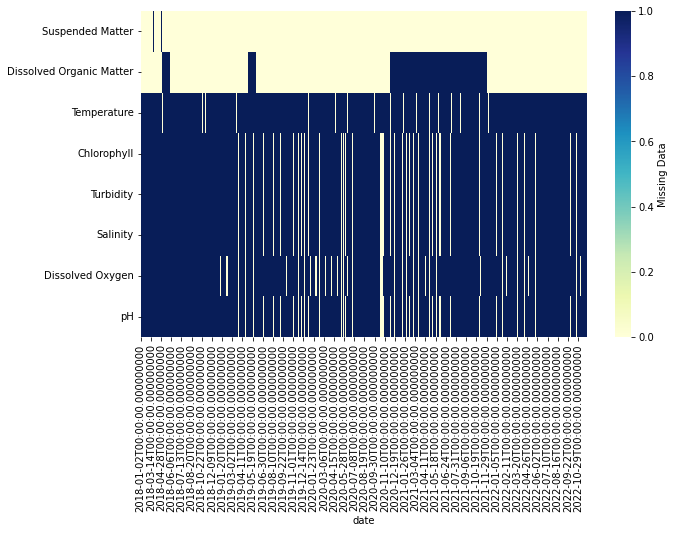

In [191]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

# **Analysis of Data**

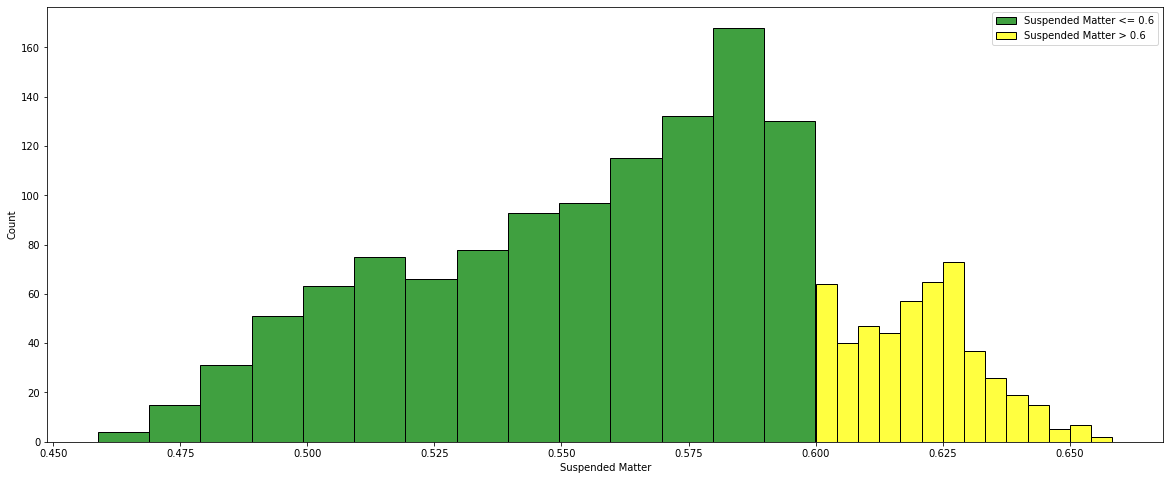

In [192]:
limit = 0.600
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Suspended Matter', data=df[df['Suspended Matter'] <= limit], color='green', label=f'Suspended Matter <= {limit}')
sns.histplot(x='Suspended Matter', data=df[df['Suspended Matter'] > limit], color='yellow', label=f'Suspended Matter > {limit}', ax=ax)
ax.set_xlabel('Suspended Matter')
ax.set_ylabel('Count')
ax.legend()
plt.show()

> **75%** of the values of Suspended Matter lie in **good zone** & rest **25%** of them **need treatment**.

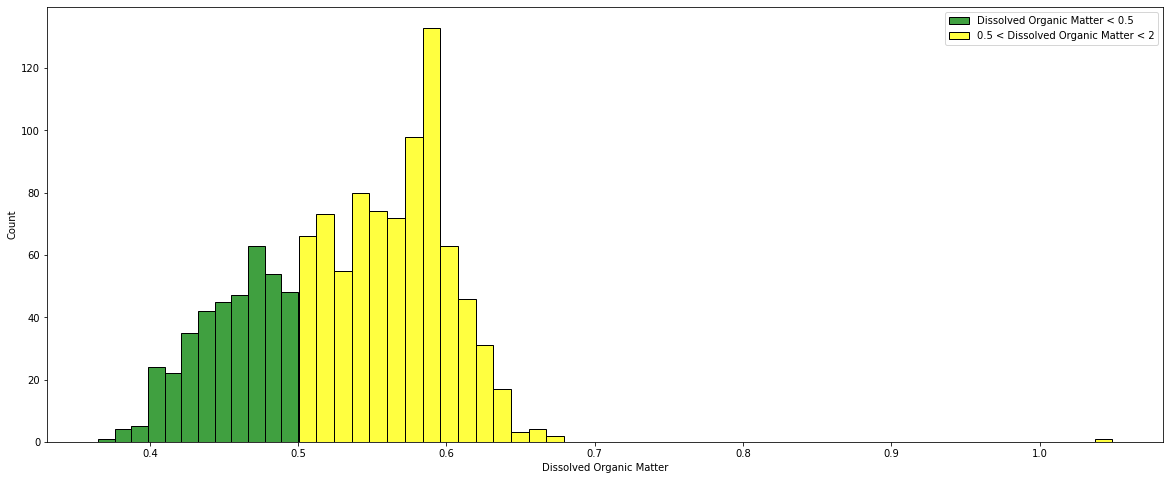

In [193]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Dissolved Organic Matter', data=df[(df['Dissolved Organic Matter'] <0.5 )], color='green', label='Dissolved Organic Matter < 0.5')
sns.histplot(x='Dissolved Organic Matter', data=df[(df['Dissolved Organic Matter'] >= 0.5) & (df['Dissolved Organic Matter'] <=2)], color='yellow', label='0.5 < Dissolved Organic Matter < 2')
sns.histplot(x='Dissolved Organic Matter', data=df[(df['Dissolved Organic Matter'] > 2 )], color='red', label='Dissolved Organic Matter >= 2')
ax.set_xlabel('Dissolved Organic Matter')
ax.set_ylabel('Count')
ax.legend()
plt.show()

> More than **50%** of the values of Dissolved Organic Matter lie in **need treatment zone**.

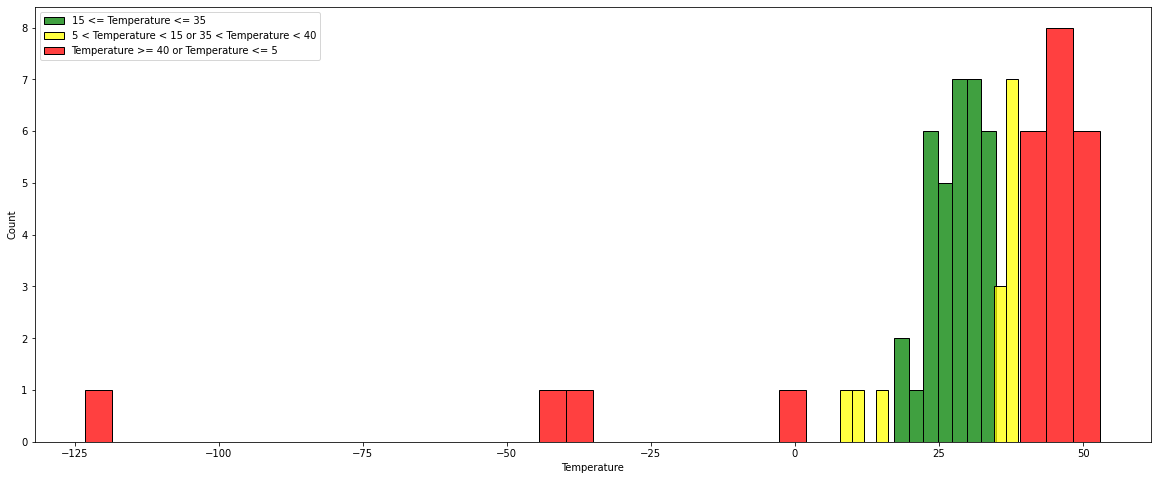

In [194]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Temperature', data=df[(df['Temperature'] <= 35) & (df['Temperature'] >= 15)], color='green', label='15 <= Temperature <= 35')
sns.histplot(x='Temperature', data=df[((df['Temperature'] > 35) & (df['Temperature'] < 40)) | ((df['Temperature'] < 15)&(df['Temperature'] > 5))], color='yellow', label='5 < Temperature < 15 or 35 < Temperature < 40')
sns.histplot(x='Temperature', data=df[(df['Temperature'] >= 40) | (df['Temperature'] <= 5)], color='red', label='Temperature >= 40 or Temperature <= 5')
ax.set_xlabel('Temperature')
ax.set_ylabel('Count')
ax.legend()
plt.show()

1. All the zones have equal contributions.
2. Tempratures <=0 are outliers & in the bad zone which degrade the quality of our dataset.

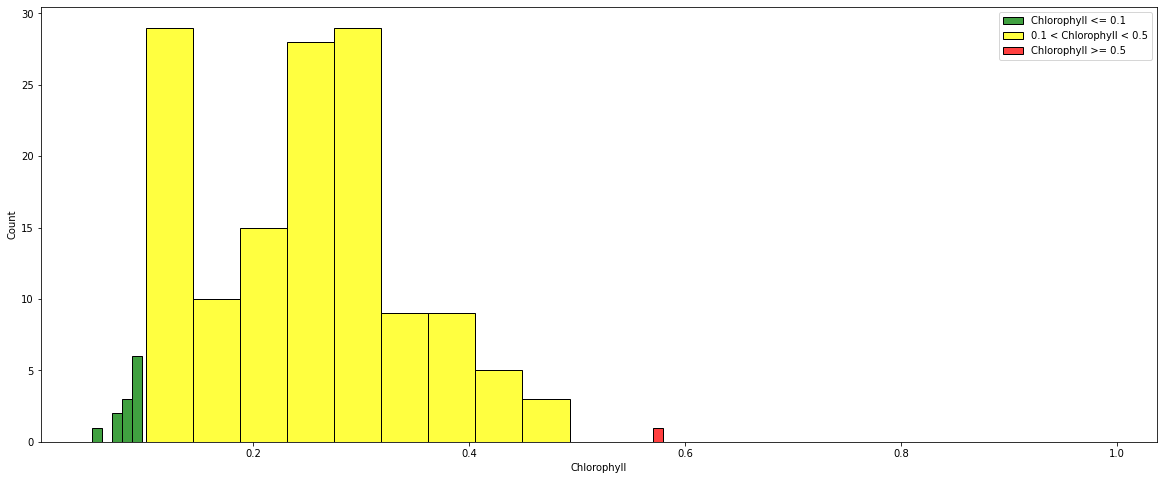

In [195]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Chlorophyll', data=df[(df['Chlorophyll'] <= 0.1) & (df['Chlorophyll'] >= -0.1)], color='green', label='Chlorophyll <= 0.1')
sns.histplot(x='Chlorophyll', data=df[(df['Chlorophyll'] > 0.1) & (df['Chlorophyll'] < 0.5)], color='yellow', label='0.1 < Chlorophyll < 0.5')
sns.histplot(x='Chlorophyll', data=df[(df['Chlorophyll'] >= 0.5)], color='red', label='Chlorophyll >= 0.5',bins=np.arange(0.5, 1, 0.01))
ax.set_xlabel('Chlorophyll')
ax.set_ylabel('Count')
ax.legend()
plt.show()

1. Most of the Chlorophyll data lies in the need treatment zone.
2. The single poor zone point is an outlier.

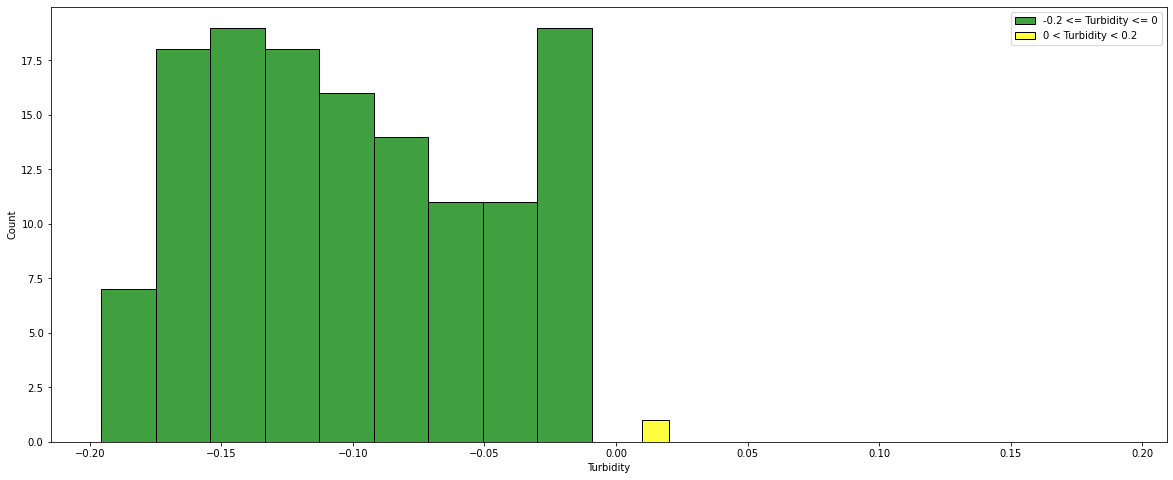

In [196]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Turbidity', data=df[(df['Turbidity'] <= 0) & (df['Turbidity'] >= -0.2)], color='green', label='-0.2 <= Turbidity <= 0')
sns.histplot(x='Turbidity', data=df[(df['Turbidity'] > 0) & (df['Turbidity'] < 0.2)], color='yellow', label='0 < Turbidity < 0.2',bins=np.arange(0, 0.2, 0.01))
ax.set_xlabel('Turbidity')
ax.set_ylabel('Count')
ax.legend()
plt.show()

Most of the values of Turbidity lie in good zone & a few of them in needs treatment zone.

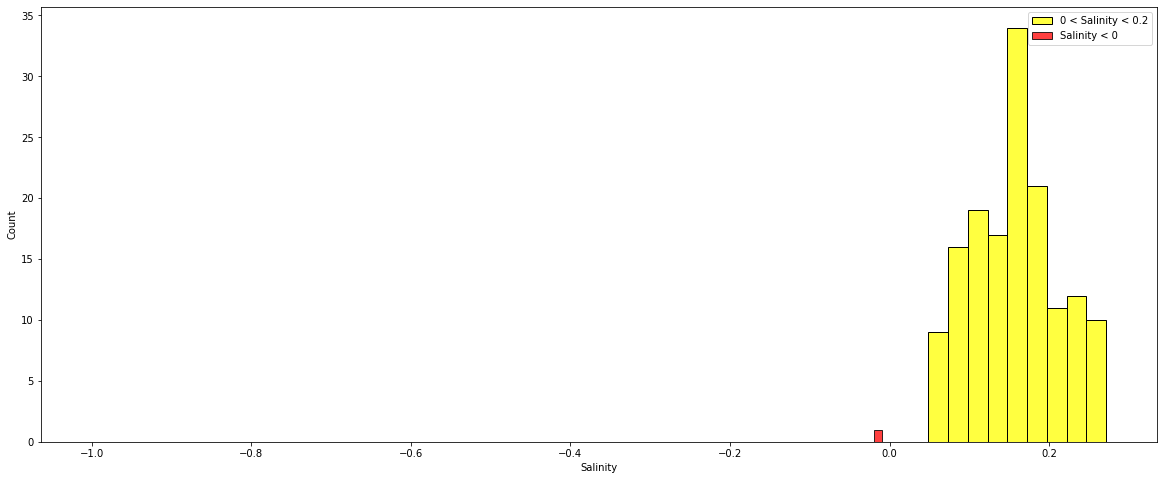

In [197]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Salinity', data=df[(df['Salinity'] >= 0) & (df['Salinity'] <=1)], color='yellow', label='0 < Salinity < 0.2')
sns.histplot(x='Salinity', data=df[(df['Salinity'] < 0)], color='red', label='Salinity < 0',bins=np.arange(-1, 0, 0.01))
ax.set_xlabel('Salinity')
ax.set_ylabel('Count')
ax.legend()
plt.show()

1. Almost all of the values of Salinity lie in need treatment zone.
2. The single poor zone point is an outlier.

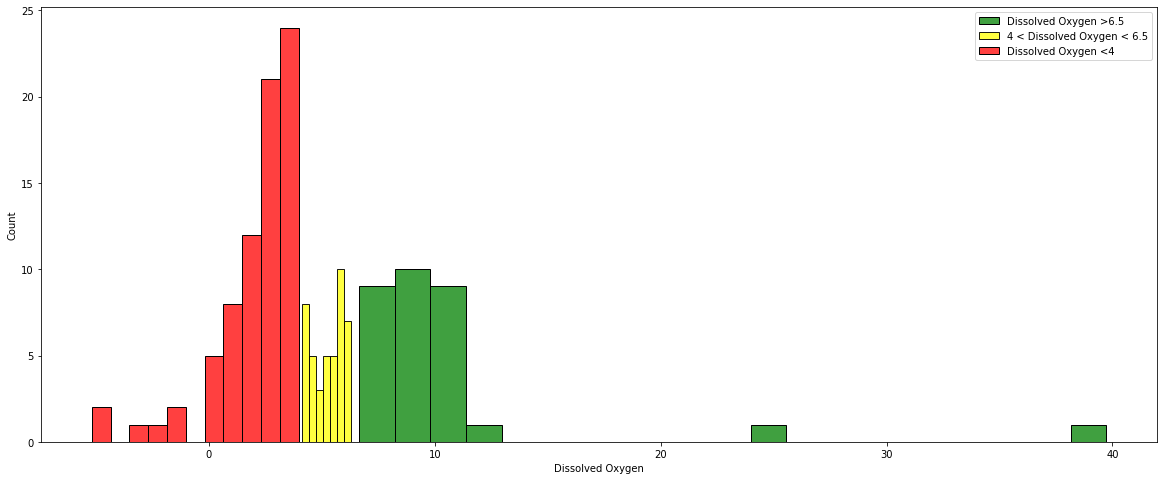

In [198]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Dissolved Oxygen', data=df[(df['Dissolved Oxygen'] >6.5 )], color='green', label='Dissolved Oxygen >6.5')
sns.histplot(x='Dissolved Oxygen', data=df[(df['Dissolved Oxygen'] >= 4) & (df['Dissolved Oxygen'] <=6.5)], color='yellow', label='4 < Dissolved Oxygen < 6.5')
sns.histplot(x='Dissolved Oxygen', data=df[(df['Dissolved Oxygen'] <4 )], color='red', label='Dissolved Oxygen <4')
ax.set_xlabel('Dissolved Oxygen')
ax.set_ylabel('Count')
ax.legend()
plt.show()

1. The zones of Dissolved Oxygen are in almost equal ratio with more data in the poor zone.
2. The points below 0 are outliers and in the poor zone.

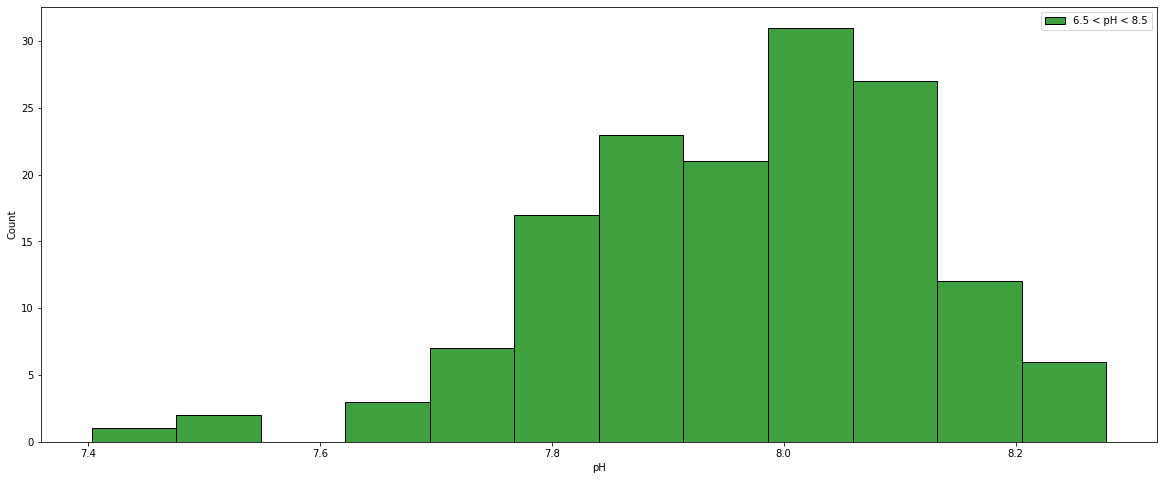

In [199]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='pH', data=df[(df['pH'] >= 6.5) & (df['pH'] <=8.5)], color='green', label='6.5 < pH < 8.5')
sns.histplot(x='pH', data=df[((df['pH'] > 4) & (df['pH'] < 6.5)) | ((df['pH'] < 11)&(df['pH'] > 8.5))], color='yellow', label='4 < pH < 6.5 or 8.5 < pH < 11')
sns.histplot(x='pH', data=df[((df['pH'] > 11) & (df['pH'] < 14)) | ((df['pH'] < 4)&(df['pH'] > 1))], color='red', label='11 < pH < 14 or 1 < pH < 4')
ax.set_xlabel('pH')
ax.set_ylabel('Count')
ax.legend()
plt.show()

100% of the data is in the good zone.

**We arrive to the following conclusions:**
  1. **Good zones parameters:**

    **a. Suspended Matter** 

    **b. Turbidity**

    **c. pH**
  2. **Needs treatment zones parameters:**

    **a. Dissolved Organic Matter**

    **b. Chlorophyll**

    **c. Salinity**
  3. **Poor zones parameters:**

    **a. Temperature**

    **b. Dissolved Oxygen**

In [200]:
import plotly.express as px
import matplotlib.pyplot as plt
for i in df1.columns:
  fig = px.box(df, y=i)
  plt.figsize=(18,4)
  fig.show()

The outliers insights have been mentioned in the above graphs.The one which have not been mentioned are outliers but still in the good zone so can be neglected.

# **Yearwise data plotting for outliers**

In [201]:
for i in df1.columns:
  fig = px.box(df, x="Year", y=i)
  fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
  fig.show()

**Outliers in pre-covid years:**

  1. **Suspended Matter**

**Outliers in covid & post-covid years:**

  1. **Dissolved Organic Matter**

  2. **Chlorophyll**

  3. **Turbidity**

  4. **Salinity**

  5. **Dissolved Oxygen**

  6. **pH**

**Temperature has equal outliers in both types but more adverse in pre-covid.**

# **Monthwise grouping on yearly basis**

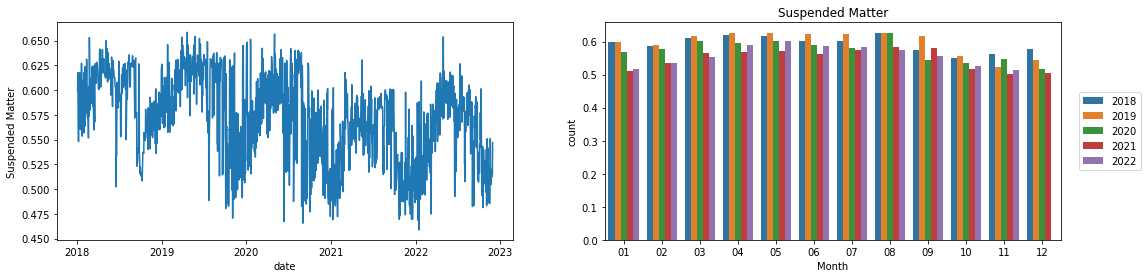

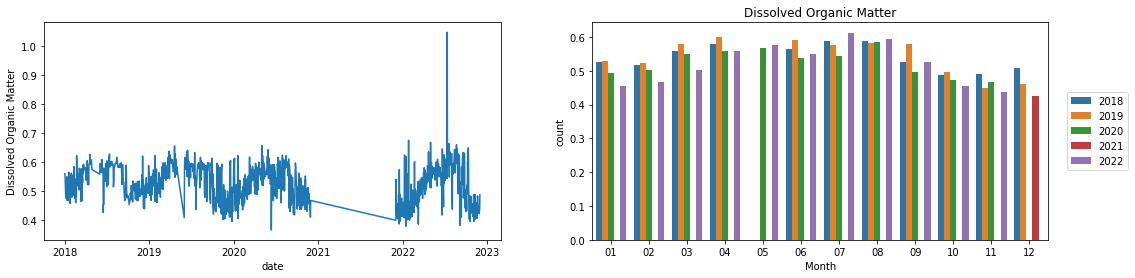

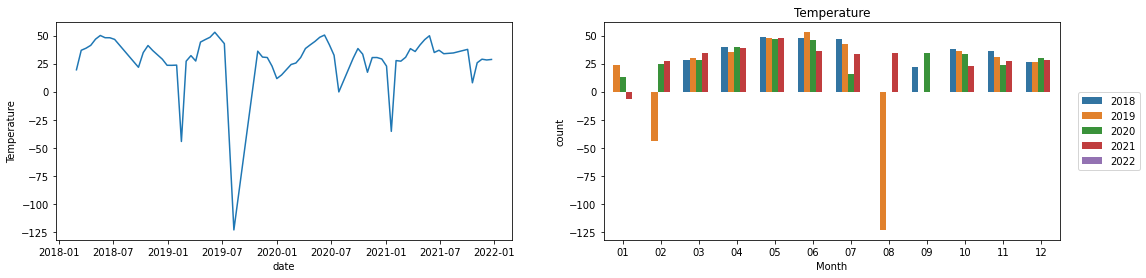

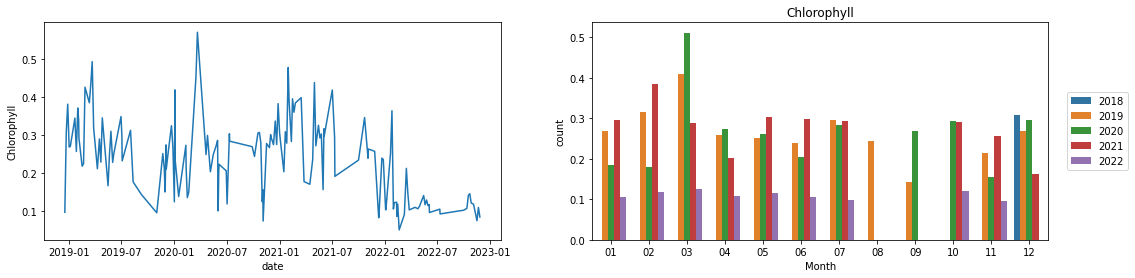

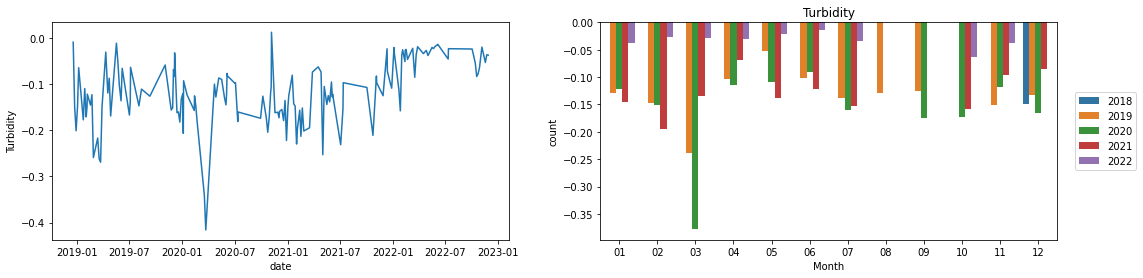

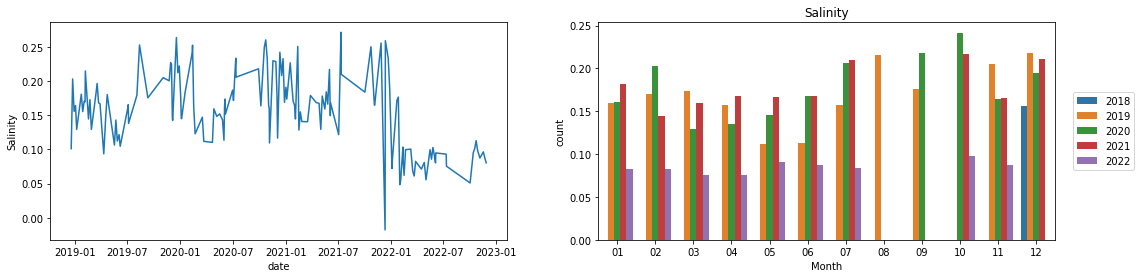

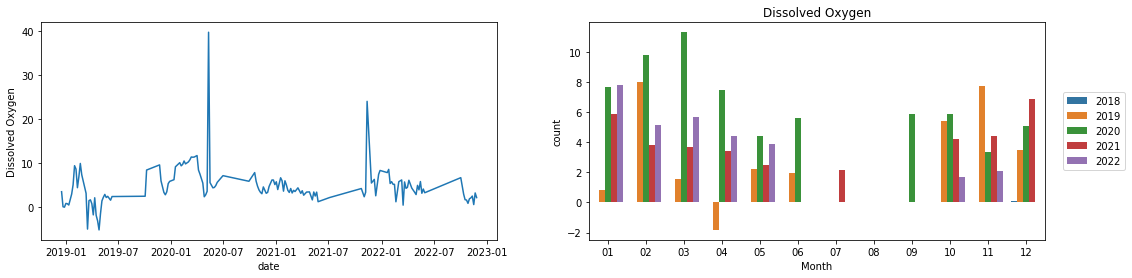

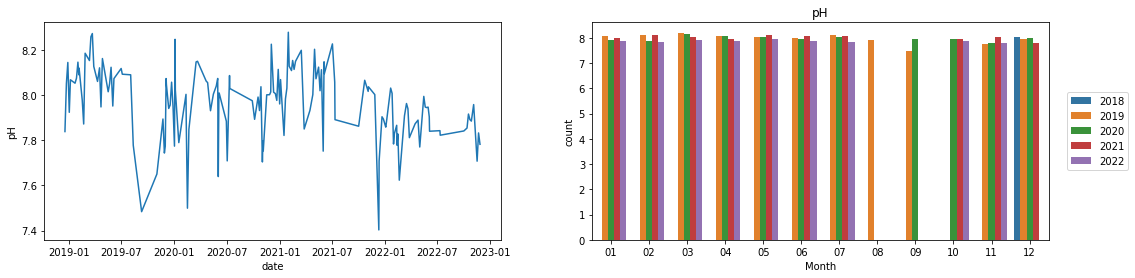

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
df2 = pd.DataFrame()
for i in df1.columns:
    r_mean_daily_max = df.groupby(['Year', 'Month','Day'], as_index=False)[i].max()
    mda8 = r_mean_daily_max.groupby(['Year', 'Month'], as_index=False)[i].median()
    fig,ax=plt.subplots(1,2,figsize=(18,4))
    sns.lineplot(data=df1[i],ax=ax[0])
    sns.barplot(x='Month', y=i, data=mda8, hue='Year',ax=ax[1])
    df2[i]=r_mean_daily_max.groupby(['Year', 'Month'], as_index=True)[i].median()
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.title(i)
    plt.ylabel('count')
    plt.show()

1. **Suspended Matter**

  a. **Pre-Covid years have more values in needs treatment zone whereas post-covid years have less or almost 0.**

  b. **Post-Covid years have brought a positive change in the quality of suspended matter.**

  c. **Summer & Pre-monsoon months have constant suspended matter values for the year 2019.**
2. **Dissolved Organic Matter**

  a. **Covid & post-covid years with post monsoon and winter months have good zone values.**

3. **Temperature**

 a. **May is the hottest month & Jan the coolest.**

4. **Chlorophyll**

 a. **2022 has the best(good) values for chlorophyll throught the year.**

 b. **Covid year has got maximum fluctuations & outliers.**

5. **Turbidity**

  a. **Turbidity has inverse relation with chlorophyll which can be seen through the graph.**

6.  **Salinity**

  a. **All the values in 2022 need treatment.**

  b. **Rest all years have good salinity values.**

7. **Dissolved Oxygen**

  a. **Covid year has best(good) values for dissolved oxygen throughout the year.**

8. **pH**

  a. **2019 has almost same pH value throught the year.**

# **Individual Plotting**

In [203]:
import plotly.express as px
for i in df1.columns:
  fig = px.scatter(df, y=i,
                color='Year')
  plt.figsize=(18,4)
  fig.show()

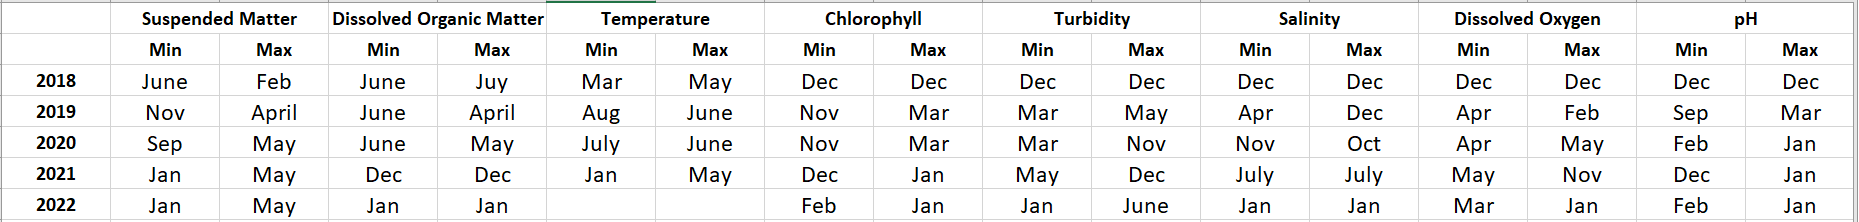

1. **Suspended Matter**

  a. **2018 has an error as temp and spm are positively correlated but over here the opposite is being observed.**

  b. **Post-covid years have exactly correct readings with min values in hottest and max values in coolest month.**

2. **Dissolved Organic Matter**

  a. **Only max values for pre-covid years are correct.**

  b. **Rest all of the data has errors as it does not matches with scientific proofs.**

3. **Temperature**

  a. **Min values for 2018 & 2021 have errors as it is not possible for temp to be min in winter months.**

4. **Chlorophyll**

  a. **Min values have errors as chlorophyll is positively related with temperature therefore, it cannot have min values in winter months.**

5. **Turbidity**

  a. **2018 & 2022 have errors in data as turbidity is inverselsy related with themp and it is showing the opposite.**

6. **Salinity**

  a. **It has a lot of errors as no value is matching with scientific reaons.**

7. **Dissolved Oxygen**

  a. **2020 has an outlier for max value as it goes againt scientific reaons.**

8. **pH**

  a. **Max pH values have errors as pH is positively correlated with temperature and the show the opposite.**

<AxesSubplot:>

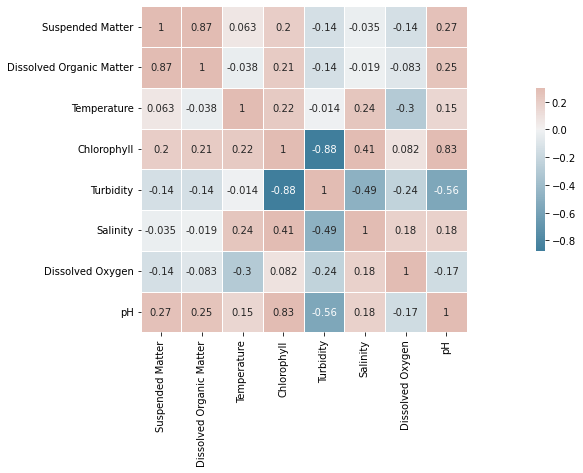

In [204]:
plt.figure(figsize=(25,6))
sns.heatmap(df1.corr(),annot=True,cmap=sns.diverging_palette(230, 20, as_cmap=True),vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

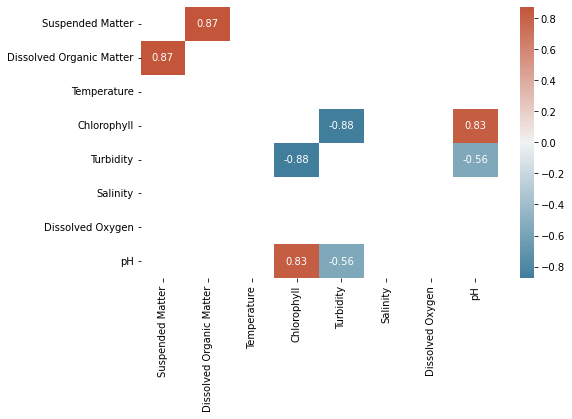

In [205]:
dfCorr = df1.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(8,5))
sns.heatmap(filteredDf, annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.show()

1. **Spm & Dom have strong positive correlation of 0.87 . They also have maximum good zone values which will increase the purity of the lake.**

2. **Chlorophyll & pH have strong positive correlation of 0.83 . pH lies in good zone & Chlorophyll in needs treatment zone.**

3. **Chlorophyll & Turbidity have strong negative correlation of -0.88 . Turbidity lies in good zone & Chlorophyll in needs treatment zone.**

4. **pH & Turbidity have strong negative correlation of -0.56 . They also have maximum good zone values which will increase the purity of the lake.**

In [206]:
df2.columns

Index(['Suspended Matter', 'Dissolved Organic Matter', 'Temperature',
       'Chlorophyll', 'Turbidity', 'Salinity', 'Dissolved Oxygen', 'pH'],
      dtype='object')

In [207]:
df2=df2.reset_index()
df2['date'] = pd.to_datetime(df2[['Year', 'Month']].assign(DAY=1))
df2=df2.set_index("date")
df2.head()

,Year,Month,Suspended Matter,Dissolved Organic Matter,Temperature,Chlorophyll,Turbidity,Salinity,Dissolved Oxygen,pH
date,,,,,,,,,,
2018-01-01,2018,01,0.597378,0.527172,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,2018,02,0.585299,0.518589,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01,2018,03,0.612036,0.559992,28.156619,NaN,NaN,NaN,NaN,NaN
2018-04-01,2018,04,0.619042,0.580489,39.972124,NaN,NaN,NaN,NaN,NaN
2018-05-01,2018,05,0.616538,NaN,48.389943,NaN,NaN,NaN,NaN,NaN


# **Individual Plotting after taking median monthly.**

In [208]:
import plotly.express as px
df3=df2.filter(['Suspended Matter', 'Dissolved Organic Matter',
       'Temperature', 'Chlorophyll', 'Turbidity', 'Salinity',
       'Dissolved Oxygen', 'pH'])
for i in df3.columns:
  fig = px.line(df2, y=i,line_dash='Year',
                color='Year')
  plt.figsize=(18,4)
  fig.show()

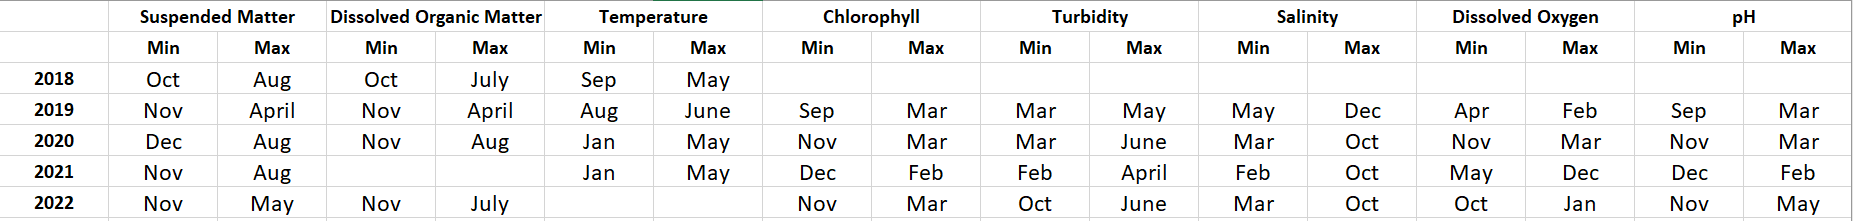

1. **Suspended Matter**

  a. **2018's erros has improved towards more positive correlation.**

2. **Dissolved Organic Matter**

  a. **All errors have been resolved & readings show positive correlation of DOM with temperature.**

3. **Temperature**

  a. **Min values for 2018 still have errors as it is not possible for temp to be min in winter months.**

  b. **Also 2021 has changed to 2019 for errors.**

4. **Chlorophyll**

  a. **All values have errors as chlorophyll is positively related with temperature therefore, it cannot have min values in winter months.**

5. **Turbidity**

  a. **2018 & 2022  errors have been resolved.**

6. **Salinity**

  a. **Few errors have been resolved as now we can observe that post covid years' min values are correct from a scientific point of view.**

7. **Dissolved Oxygen**

  a. **2020 has an outlier for min value(shifted from max) as it goes against scientific reaons.**

8. **pH**

  a. **Max pH values have errors as pH is positively correlated with temperature and the show the opposite except 2022 now.**

<AxesSubplot:>

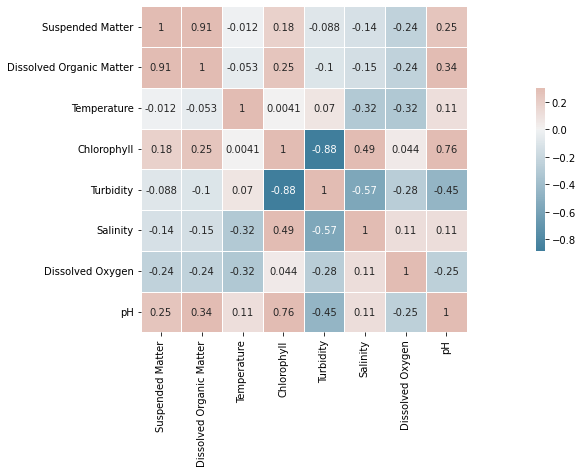

In [209]:
plt.figure(figsize=(25,6))
sns.heatmap(df3.corr(),annot=True,cmap=sns.diverging_palette(230, 20, as_cmap=True),vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

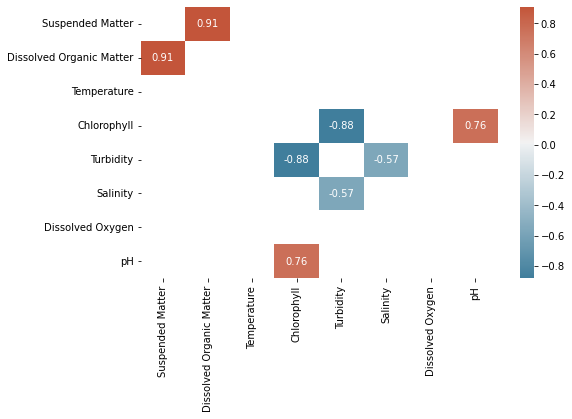

In [210]:
dfCorr = df3.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(8,5))
sns.heatmap(filteredDf, annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.show()

1. **SPM & DOM have strong positive correlation increased from 0.87 to 0.91 . They also have maximum good zone values which will increase the purity of the lake.**

2. **Chlorophyll & pH have strong positive correlation decreased from 0.83 to 0.76 . pH lies in good zone & Chlorophyll in needs treatment zone.**

3. **Chlorophyll & Turbidity have strong negative correlation of -0.88(remains same). Turbidity lies in good zone & Chlorophyll in needs treatment zone.**

4. **pH & Turbidity have no correlation now.**

5. **Salinity & Turbidity have now a correlation of -0.57 .Turbidity lies in good zone & Salinity in needs treatment zone.**

# Removing outliers & visualising data

In [211]:
df_new = df[(df['Temperature'] > 0) | (np.isnan(df['Temperature']))]
df_new = df_new[((df_new['Dissolved Oxygen'] <= 10) & (df_new['Dissolved Oxygen'] >= 2)) | (np.isnan(df_new['Dissolved Oxygen']))]
df_new

,Suspended Matter,Dissolved Organic Matter,Chlorophyll,Turbidity,Salinity,pH,Temperature,Dissolved Oxygen,Year,Month,Day
date,,,,,,,,,,,
2018-01-02,0.598896,0.559756,NaN,NaN,NaN,NaN,NaN,NaN,2018,01,02
2018-01-03,0.617667,0.550453,NaN,NaN,NaN,NaN,NaN,NaN,2018,01,03
2018-01-06,0.547938,0.475668,NaN,NaN,NaN,NaN,NaN,NaN,2018,01,06
2018-01-07,0.595860,0.522746,NaN,NaN,NaN,NaN,NaN,NaN,2018,01,07
2018-01-10,0.564151,0.468822,NaN,NaN,NaN,NaN,NaN,NaN,2018,01,10
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-26,0.518224,0.440914,NaN,NaN,NaN,NaN,NaN,NaN,2022,11,26
2022-11-27,0.512168,0.421120,0.084518,-0.037226,0.080303,7.782077,NaN,2.158886,2022,11,27
2022-11-28,0.514186,0.432148,NaN,NaN,NaN,NaN,NaN,NaN,2022,11,28


In [212]:
df4=df_new.filter(['Suspended Matter', 'Dissolved Organic Matter', 'Temperature','Chlorophyll', 'Turbidity', 'Salinity', 'Dissolved Oxygen', 'pH'])

In [213]:
import plotly.express as px
import matplotlib.pyplot as plt
for i in df4.columns:
  fig = px.box(df_new, y=i)
  plt.figsize=(18,4)
  fig.show()

We observe that upon removing outliers from temperature & dissolved oxygen, outliers for other parameters also got removed & a few are only left.

In [214]:
df5 = pd.DataFrame()
for i in df4.columns:
    r_mean_daily_max = df_new.groupby(['Year', 'Month','Day'], as_index=False)[i].max()
    mda8 = r_mean_daily_max.groupby(['Year', 'Month'], as_index=False)[i].median()
    df5[i]=r_mean_daily_max.groupby(['Year', 'Month'], as_index=True)[i].median()

<AxesSubplot:>

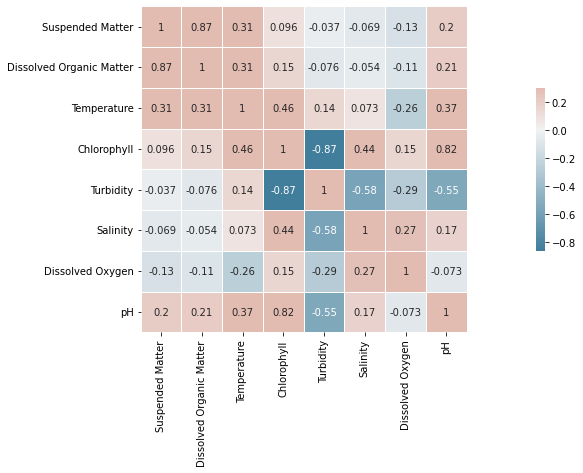

In [215]:
plt.figure(figsize=(25,6))
sns.heatmap(df4.corr(),annot=True,cmap=sns.diverging_palette(230, 20, as_cmap=True),vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

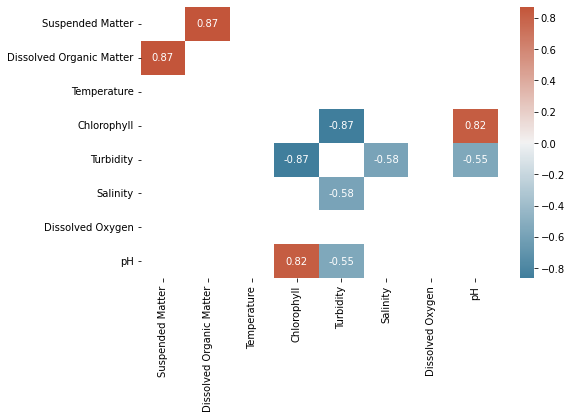

In [216]:
dfCorr = df4.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(8,5))
sns.heatmap(filteredDf, annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.show()

A new correlation between turbidity & salinity of -0.58 has got added.

In [217]:
df5=df5.reset_index()
df5['date'] = pd.to_datetime(df5[['Year', 'Month']].assign(DAY=1))
df5=df5.set_index("date")
df5.head()

,Year,Month,Suspended Matter,Dissolved Organic Matter,Temperature,Chlorophyll,Turbidity,Salinity,Dissolved Oxygen,pH
date,,,,,,,,,,
2018-01-01,2018,01,0.597378,0.527172,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,2018,02,0.585299,0.518589,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01,2018,03,0.612036,0.559992,28.156619,NaN,NaN,NaN,NaN,NaN
2018-04-01,2018,04,0.619042,0.580489,39.972124,NaN,NaN,NaN,NaN,NaN
2018-05-01,2018,05,0.616538,NaN,48.389943,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

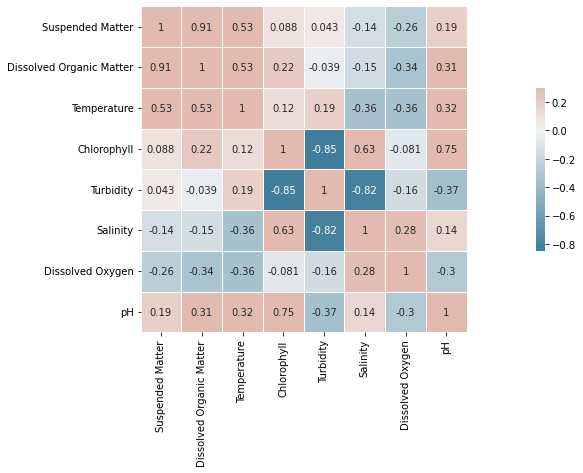

In [218]:
plt.figure(figsize=(25,6))
sns.heatmap(df5.corr(),annot=True,cmap=sns.diverging_palette(230, 20, as_cmap=True),vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

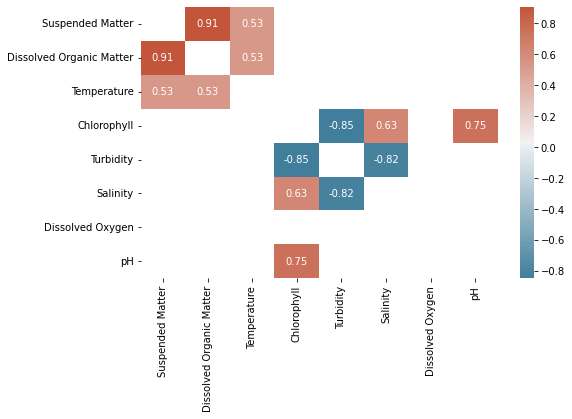

In [219]:
dfCorr = df5.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(8,5))
sns.heatmap(filteredDf, annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.show()

Following new correlations have got added:

1. Temperature & Spm - 0.53 .

2. Temperature & Dissolved Organic Matter - 0.53 .

3. Salinity & Chlorophyll - 0.63 .